In [86]:
# Francisco Lobeira
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from functools import reduce
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

In [87]:
# Mouse data table print
mouse_metadata.head()
#len(mouse_metadata)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [88]:
# Study results table print
study_results.head()
#len(study_results)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [89]:
# Understand the data
u = study_results["Mouse ID"].unique()
len(u)


249

In [90]:
# There are 249 unique values in the Mouse ID column in both data sets
# Merge the two data sets
combined_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")
combined_df.head(300)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
295,b742,Capomulin,Male,7,21,25,38.617684,0
296,b742,Capomulin,Male,7,21,30,39.167949,0
297,b742,Capomulin,Male,7,21,35,39.847576,0
298,b742,Capomulin,Male,7,21,40,38.255627,0


In [91]:
# make sure all the rows are in th enew combined df
len(combined_df)

1893

In [92]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
u_regimen = combined_df["Drug Regimen"].unique()
u_regimen

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [93]:
## testing ##
regimen_gb = combined_df.groupby(['Drug Regimen'])
regimen_gb.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [94]:
# Extra... 
# generate a summary stat table for the entire population use tumor volume

v_mean = combined_df['Tumor Volume (mm3)'].mean()
v_median = combined_df['Tumor Volume (mm3)'].median()
v_mode = combined_df['Tumor Volume (mm3)'].mode()
v_sem = combined_df['Tumor Volume (mm3)'].sem()
v_std = combined_df['Tumor Volume (mm3)'].std()

In [95]:
#Summary Statistics fro each regimen
# I will create different data frames and then combine them to get the desired solution
mean_df = combined_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].mean().reset_index()
median_df = combined_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].median().reset_index()
sem_df = combined_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].sem().reset_index()
std_df = combined_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].std().reset_index()

In [96]:
# Merge all the data frames to have a single table with all the info
mergeOne = pd.merge(mean_df, median_df, on = "Drug Regimen", how = "outer")
mergeTwo = pd.merge(mergeOne, sem_df, on = "Drug Regimen", how = "outer")
summaryStats = pd.merge(mergeTwo, std_df, on = "Drug Regimen", how = "outer")
summaryStats

,Drug Regimen,Tumor Volume (mm3)_x,Tumor Volume (mm3)_y,Tumor Volume (mm3)_x,Tumor Volume (mm3)_y
0,Capomulin,40.675741,41.557809,0.329346,4.994774
1,Ceftamin,52.591172,51.776157,0.469821,6.268188
2,Infubinol,52.884795,51.820584,0.492236,6.567243
3,Ketapril,55.235638,53.698743,0.603860,8.279709
4,Naftisol,54.331565,52.509285,0.596466,8.134708
5,Placebo,54.033581,52.288934,0.581331,7.821003
6,Propriva,52.322552,50.854632,0.512884,6.507770
7,Ramicane,40.216745,40.673236,0.320955,4.846308
8,Stelasyn,54.233149,52.431737,0.573111,7.710419
9,Zoniferol,53.236507,51.818479,0.516398,6.966589


In [97]:
# Rename teh columns so thet it makes sense
summaryStats.columns= ['Drug Regimen', 'Average', 'Median', 'SME', "STD"]
summaryStats

,Drug Regimen,Average,Median,SME,STD
0,Capomulin,40.675741,41.557809,0.329346,4.994774
1,Ceftamin,52.591172,51.776157,0.469821,6.268188
2,Infubinol,52.884795,51.820584,0.492236,6.567243
3,Ketapril,55.235638,53.698743,0.603860,8.279709
4,Naftisol,54.331565,52.509285,0.596466,8.134708
5,Placebo,54.033581,52.288934,0.581331,7.821003
6,Propriva,52.322552,50.854632,0.512884,6.507770
7,Ramicane,40.216745,40.673236,0.320955,4.846308
8,Stelasyn,54.233149,52.431737,0.573111,7.710419
9,Zoniferol,53.236507,51.818479,0.516398,6.966589


Text(0, 0.5, 'Count')

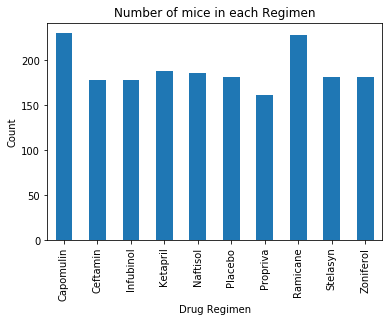

In [98]:
# Using DataFrame.plot
regimen_count_df = combined_df.groupby(['Drug Regimen'])['Age_months'].count()
regimen_count_df.plot.bar()
plt.title("Number of mice in each Regimen")
plt.ylabel("Count")

In [99]:
# Using Matplotlib's pyplot
regimen_count_df = combined_df.groupby(['Drug Regimen'])['Age_months'].count()
x_axis = np.arange(len(regimen_count_df))


Text(0.5, 0, 'Drug Regimen')

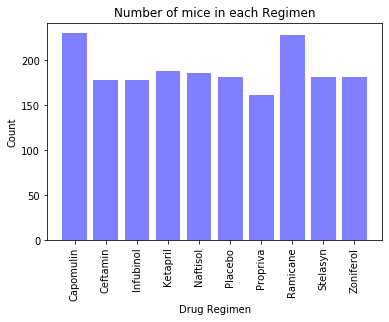

In [100]:
plt.bar(x_axis, regimen_count_df, color='b', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva",
                            "Ramicane", "Stelasyn", "Zoniferol"], rotation = 90)
plt.title("Number of mice in each Regimen")
plt.ylabel("Count")
plt.xlabel("Drug Regimen")

Text(0.5, 1.0, 'Male vs Female')

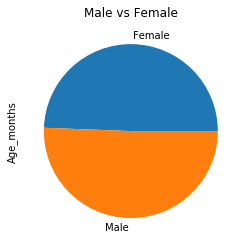

In [101]:
# Using DataFrame.plot
sex = combined_df.groupby(['Sex'])['Age_months'].count()
sex.plot.pie()
plt.title("Male vs Female")

([<matplotlib.patches.Wedge at 0x1a6034d6408>,
 [Text(-0.7230187918402546, -0.8290017048509964, 'Male'),
  Text(0.7230187918402547, 0.8290017048509963, 'Female')],
 [Text(-0.39437388645832067, -0.4521827481005435, '49.4%'),
  Text(0.3943738864583208, 0.4521827481005434, '50.6%')])

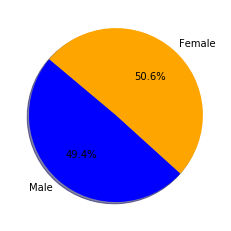

In [102]:
labels = ["Male","Female"]
sizes = sex
colors = ["blue", "orange"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

In [110]:
#Create 4 data frames for the 4 regimens we wan to analize (Capomulin, Ramicane, Infubinol, and Ceftamin.)
capomulin_df = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin"]
ramicane_df = combined_df.loc[combined_df["Drug Regimen"] == "Ramicane"]
infubinol_df = combined_df.loc[combined_df["Drug Regimen"] == "Infubinol"]
caftamin_df = combined_df.loc[combined_df["Drug Regimen"] == "Ceftamin"]
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [116]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens
cap_finalV = capomulin_df.groupby(['Mouse ID'])['Tumor Volume (mm3)','Timepoint'].max()
cap_finalV

,Tumor Volume (mm3),Timepoint
Mouse ID,,
b128,45.651331,45
b742,45.000000,45
f966,45.000000,20
g288,46.304003,45
g316,46.809225,45
i557,47.685963,45
i738,45.595685,45
j119,48.158209,45
j246,46.408361,35
